### first of all: create a virtual environment to avoid future conflict dependency problems

## Install TensorFlow

In [ ]:
# !pip install tensorflow

In [105]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import timeit

## Create a tensor

In [2]:
# Creating tensors
scalar = tf.constant(1)  # 0D tensor (scalar)
vector = tf.constant([1, 2, 3])  # 1D tensor (vector)
matrix = tf.constant([[1, 2], [3, 4]])  # 2D tensor (matrix)

scalar.shape, vector.shape, matrix.shape

(TensorShape([]), TensorShape([3]), TensorShape([2, 2]))

In [23]:
print("Eager execution:", tf.executing_eagerly())

Eager execution: True


## Graph execution vs eager execution

Tensorflow uses computional (directed acyclic) graphs that contains nodes (which are the operations, such as addition, multiplication, etc.) and edges are the data (tensors) to  carry information from one node (one operation) to another.

[Example](figures/graph.png)

In [13]:
# Create a simple computational graph
a = tf.constant(15)
b = tf.constant(5)
product = tf.multiply(a, b)
sum = tf.add(a, b)
res = tf.divide(product, sum)
res

<tf.Tensor: shape=(), dtype=float64, numpy=3.75>

### Graph execution:
- The computational graph allows for a very simple way to explain the dependencies between the elements of the graph. This straightforward approach allows for using parallel execution (multiple threads, GPUs and/or machiens), e.g., we could execute the multiplication and addition in parallel as shown in the figure, since they are independent of each other.
- portability due to the language-independent of the graph, i.e. you can write the graph in python then save it and restore it again using another language, e.g., c++.

Bottomline: graph execution offers an efficient and fast way to parallelize the computations, which is a must when using big models.

In [14]:
# Run the computation using eager execution (no computational graph)
result = res.numpy()
print("Result:", result)

Result: 3.75


However, **eager excution** is more user friendly which allows for debugging, understanding the code and using language dependent statements, for example, the loop and if statement in python.

## Best of both worlds: 'TF.function' decorator

In [110]:
tf.config.run_functions_eagerly(False)

In [105]:
@tf.function
def demonstrate():
    a = tf.constant(15)
    b = tf.constant(5)
    product = tf.multiply(a, b)
    sum = tf.add(a, b)
    res = tf.divide(product, sum)
    # print("Tracing")
    return res

In [90]:
res = demonstrate()
res

<tf.Tensor: shape=(), dtype=float64, numpy=3.75>

In [96]:
res = demonstrate()
res

Eager Execution


<tf.Tensor: shape=(), dtype=float64, numpy=3.75>

## Create a simple CNN model

In [80]:
# Create a simple feedforward neural network
model = Sequential(
    [
        Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(64, activation="relu"),
        Dense(10, activation="softmax"),
    ]
)

In [81]:
# Before training, you need to compile the model by specifying the optimizer,
# loss function, and evaluation metrics.
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

## Load the MNIST Dataset

In [30]:
# Replace these paths with the paths to the downloaded CSV files
train_path = "./data/mnist_train.csv"
test_path = "./data/mnist_test.csv"

In [82]:
# Load the MNIST dataset
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

# Extract labels (first column) and features (remaining columns)
train_labels = train_data.iloc[:, 0].to_numpy()
train_images = train_data.iloc[:, 1:].to_numpy()
test_labels = test_data.iloc[:, 0].to_numpy()
test_images = test_data.iloc[:, 1:].to_numpy()

In [83]:
# Normalize the images to the range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape the input data to match the expected input shape of the model
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

train_images.shape, test_images.shape

((59999, 28, 28, 1), (9999, 28, 28, 1))

## Train the model

In [84]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 32s 16ms/step - loss: 0.1720 - accuracy: 0.9493
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0600 - accuracy: 0.9812
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0400 - accuracy: 0.9877
Epoch 4/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0273 - accuracy: 0.9915
Epoch 5/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0201 - accuracy: 0.9937
Epoch 6/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0143 - accuracy: 0.9955
Epoch 7/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0102 - accuracy: 0.9966
Epoch 8/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0086 - accuracy: 0.9969
Epoch 9/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0062 - accuracy: 0.9980
Epoch 10/10
1875/1875 [==============================] - 34s 18m

## Test the performance of the model

In [85]:
loss, accuracy = model.evaluate(test_images, test_labels)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")

313/313 [==============================] - 2s 7ms/step - loss: 0.0561 - accuracy: 0.9855
Test loss: 0.056057535111904144
Test accuracy: 0.9854985475540161


## Visualize the output of the model

In [86]:
def plot_image(image, label):
    plt.imshow(image.reshape(28, 28), cmap="gray")
    plt.title(f"Label: {label}")
    plt.axis("off")
    plt.show()

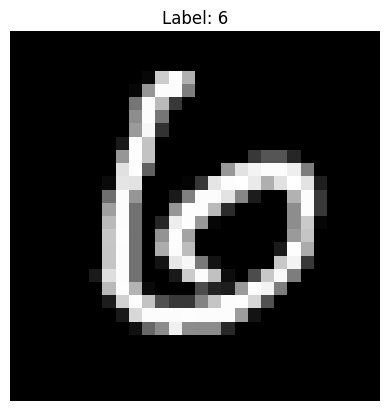

In [87]:
plot_image(test_images[10], test_labels[10])

In [96]:
# first we need to preprocess the test image (reshape to match the input format)
image = np.expand_dims(test_images[10], axis=0)

In [98]:
predictions = model.predict(image)

1/1 [==============================] - 0s 26ms/step


In [99]:
predictions

array([[4.7443577e-10, 2.4801924e-16, 3.6914200e-15, 2.5473406e-17,
        2.1365919e-16, 3.3986834e-16, 1.0000000e+00, 2.3126091e-20,
        1.0146026e-09, 1.4652194e-20]], dtype=float32)

In [100]:
predicted_class = np.argmax(predictions, axis=1)

In [102]:
predicted_class

array([6])

## Save the trained mode

In [103]:
model.save("data/saved_models/mnist_model.h5")

In [104]:
# Load the model
loaded_model = load_model("data/saved_models/mnist_model.h5")

**References:**
- https://d3lm.medium.com/understand-tensorflow-by-mimicking-its-api-from-scratch-faa55787170d
- https://www.tensorflow.org/guide/intro_to_graphs